In [72]:
import re
import matplotlib.pyplot as plt
import numpy as np
import array as arr
import pandas as pd
import json 
import os
import seaborn as sns
import nltk
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
porter = PorterStemmer()

In [ ]:
class cran1400:
    
    relevant_without_Stemming = []
    relevant_with_Stemming = []
    
    def zoneScoring(self,cndn,wT,wA,wB,wW,tKey,aKey,bKey,wKey):
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            rankDict={}
            relDocs=1
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                list1 = w.split('.A')
                topic = list1[0].split(' ')
                list2 = list1[1].split('.B')
                author = list2[0].split(' ')
                list3 = list2[1].split('.W')
                body = list3[0].split(' ')
                writing = list3[1].split(' ')
                
                wordSetTopic={""}
                wordSetAuthor={""}
                wordSetBody={""}
                wordSetWriting={""}
                
                for t in topic:
                    wordSetTopic.add((t))
                for t in author:
                    wordSetAuthor.add((t))
                for t in body:
                    wordSetBody.add((t))
                for t in writing:
                    wordSetWriting.add((t))
                
                t1 = (tKey) in wordSetTopic
                t2 = (aKey) in wordSetTopic
                t3 = (bKey) in wordSetTopic
                t4 = (wKey) in wordSetWriting
                
                zoneScore = (t1*wT)+(t2*wA)+(t3*wB)+(t4*wW)
                rankDict[list1[0]]=zoneScore
            rankDict = sorted(rankDict.items(), key=lambda d: d[1],reverse=True)
            print(rankDict)  
    
    def booleanRet(self,cndn,key1,key2):
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            print("The list of documents which satisfy query are : ")
            for w in doc_list:
                    temp = w.split(" ")
                    wordSet={""}
                    wordSetStem={""}
                    for t in temp:
                        wordSet.add(t)
                    for t in temp:
                        wordSetStem.add(porter.stem(t))
                    t1 = key1 in wordSet
                    t2 = key2 in wordSet
                    t3 = porter.stem(key1) in wordSetStem
                    t4 = porter.stem(key2) in wordSetStem
                    if cndn==1 and t1==1 and t2==1:
                        self.relevant_without_Stemming.append(w.split('.A')[0])
                        print(w.split('.A')[0])
                    if cndn==2 and not(t1==0 and t2==0):
                        self.relevant_without_Stemming.append(w.split('.A')[0])
                        print(w.split('.A')[0])
                    
                    if cndn==1 and t3==1 and t4==1:
                        self.relevant_with_Stemming.append(w.split('.A')[0])
                    if cndn==2 and not(t3==0 and t4==0):
                        self.relevant_with_Stemming.append(w.split('.A')[0])
    
    def MAPWithoutStemming(self):
        
        docs_till_now = 0.0
        relevant_doc = 0.0
        precision = 0.0
        
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            for w in doc_list:
                docs_till_now+=1
                if (w.split('.A')[0] in self.relevant_without_Stemming):
                    relevant_doc+=1

                precision+=(relevant_doc/docs_till_now)

                        
        print('{0:.3f}'.format(precision/1400))
    
    def MAPWithStemming(self):
        docs_till_now = 0.0
        relevant_doc = 0.0
        precision = 0.0
        
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            for w in doc_list:
                docs_till_now+=1
                if (w.split('.A')[0] in self.relevant_with_Stemming):
                    relevant_doc+=1

                precision+=(relevant_doc/docs_till_now)

                        
        print('{0:.3f}'.format(precision/1400))
        
    def PRGraph(self,cndn,key1,key2,titleKey,writingKey):
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            relDocs=0
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(t)
                t1 = key1 in wordSet
                t2 = key2 in wordSet
                if cndn==1 and t1==1 and t2==1:
                    relDocs=relDocs+1
                if cndn==2 and not(t1==0 and t2==0):
                    relDocs=relDocs+1
            i=1
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(t)
                t1 = key1 in wordSet
                t2 = key2 in wordSet
                if cndn==1 and t1==1 and t2==1:
                    relDocsCurrent=relDocsCurrent+1
                if cndn==2 and not(t1==0 and t2==0):
                    relDocsCurrent=relDocsCurrent+1
                ycoord.append(relDocsCurrent/i)
                i=i+1
                xcoord.append(relDocsCurrent/relDocs)
            plt.figure("Precision Recall Graph Without Stemming is as follows : ")
            plt.plot(xcoord, ycoord, 'ro')
            
            relDocs=0
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(porter.stem(t))
                t1 = porter.stem(key1) in wordSet
                t2 = porter.stem(key2) in wordSet
                if cndn==1 and t1==1 and t2==1:
                    relDocs=relDocs+1
                if cndn==2 and not(t1==0 and t2==0):
                    relDocs=relDocs+1
            i=1
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(porter.stem(t))
                t1 = porter.stem(key1) in wordSet
                t2 = porter.stem(key2) in wordSet
                if cndn==1 and t1==1 and t2==1:
                    relDocsCurrent=relDocsCurrent+1
                if cndn==2 and not(t1==0 and t2==0):
                    relDocsCurrent=relDocsCurrent+1
                ycoord.append(relDocsCurrent/i)
                i=i+1
                xcoord.append(relDocsCurrent/relDocs)
            print("")
            plt.figure("Precision Recall Graph With Stemming is as follows : ")
            plt.plot(xcoord, ycoord, 'ro') 
            
            
            relDocs=1
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                list1 = w.split('.A')
                topic = list1[0].split(' ')
                list2 = list1[1].split('.B')
                author = list2[0].split(' ')
                list3 = list2[1].split('.W')
                body = list3[0].split(' ')
                writing = list3[1].split(' ')
                
                wordSetTopic={""}
                wordSetAuthor={""}
                wordSetBody={""}
                wordSetWriting={""}
                
                for t in topic:
                    wordSetTopic.add((t))
                for t in author:
                    wordSetAuthor.add((t))
                for t in body:
                    wordSetBody.add((t))
                for t in writing:
                    wordSetWriting.add((t))
                
                t1 = (titleKey) in wordSetTopic
                t2 = (writingKey) in wordSetWriting
                if cndn==1 and t1==1 and t2==1:
                    relDocs=relDocs+1
                if cndn==2 and not(t1==0 and t2==0):
                    relDocs=relDocs+1
            i=1
            for w in doc_list:
                list1 = w.split('.A')
                topic = list1[0].split(' ')
                list2 = list1[1].split('.B')
                author = list2[0].split(' ')
                list3 = list2[1].split('.W')
                body = list3[0].split(' ')
                writing = list3[1].split(' ')
                
                wordSetTopic={""}
                wordSetAuthor={""}
                wordSetBody={""}
                wordSetWriting={""}
                
                for t in topic:
                    wordSetTopic.add((t))
                for t in author:
                    wordSetAuthor.add((t))
                for t in body:
                    wordSetBody.add((t))
                for t in writing:
                    wordSetWriting.add((t))
                
                t1 = (titleKey) in wordSetTopic
                t2 = (writingKey) in wordSetWriting
                if cndn==1 and t1==1 and t2==1:
                    relDocsCurrent=relDocsCurrent+1
                if cndn==2 and not(t1==0 and t2==0):
                    relDocsCurrent=relDocsCurrent+1
                ycoord.append(relDocsCurrent/i)
                i=i+1
                xcoord.append(relDocsCurrent/relDocs)
            print("")
            plt.figure("Precision Recall Graph for Zone indexes for title and body text fields : ")
            plt.plot(xcoord, ycoord, 'ro')

In [74]:
obj = cran1400()

In [36]:
cndn = int(input("Enter 1 for conjunction or 2 for disjunction or 3 for negation : "))

Enter 1 for conjunction or 2 for disjunction or 3 for negation : 1


In [38]:
if cndn==1 or cndn==2:
    
    #taking two input keywords
    key1 = input("Enter first keyword : ")
    key2 = input("Enter second keyword : ")
    obj.booleanRet(cndn,key1,key2)

Enter first keyword : this
Enter second keyword : problem
The list of documents which satisfy query are : 

.T
experimental investigation of the aerodynamics of a
wing in a slipstream .

 2
.T
simple shear flow past a flat plate in an incompressible fluid of small
viscosity .

 13
.T
similarity laws for stressing heated wings .

 26
.T
inviscid leading-edge effect in hypersonic flow .

 34
.T
constant-temperature magneto-gasdynamic channel flow .

 35
.T
stagnation point of a blunt body in hypersonic flow .

 44
.T
tip-bluntness effects on cone pressures at m=6.85 .

 46
.T
some comments on the inversion of certain large matrices .

 73
.T
investigation of the stability of the laminar boundary
layer in a compressible fluid .

 75
.T
studies of structural failure due to acoustic loading .

 82
.T
theoretical investigation of the ablation of a glass-type
heat protection shield of varied material properties
at the stagnation point of a re-entering irbm .

 87
.T
free-convection magnetohyd

Enter first keyword : this
Enter second keyword : problem
What would you like to search in title : of
What would you like to search in text body : the




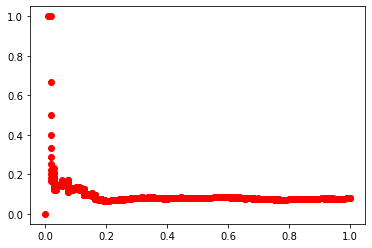

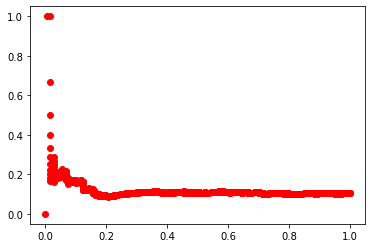

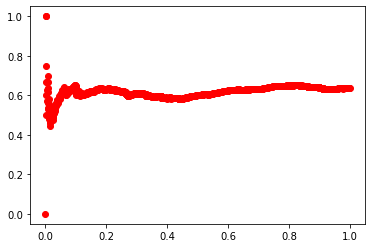

In [27]:
if cndn==1 or cndn==2:
    #taking input for plotting Precision - Recall graph with the zones
    key1 = input("Enter first keyword : ")
    key2 = input("Enter second keyword : ")
    titleKey = input("What would you like to search in title : ")
    writingKey = input("What would you like to search in text body : ")
    obj.PRGraph(cndn,key1,key2,titleKey,writingKey)

In [24]:
if cndn==1 or cndn==2:
    key1 = input("Enter first keyword : ")
    key2 = input("Enter second keyword : ")
    obj.booleanRet(cndn,key1,key2)
    obj.MAPWithStemming()

Enter first keyword : this
Enter second keyword : shear
The list of documents which satisfy query are : 
 2
.T
simple shear flow past a flat plate in an incompressible fluid of small
viscosity .

 9
.T
transition studies and skin friction measurements on
an insulated flat plate at a mach number of 5.8 .

 45
.T
an investigation of separated flows, part ii: flow
in the cavity and heat transfer .

 89
.T
an investigation of separated flows, part i: the pressure
field .

 99
.T
the fundamentals of the statistical theory of turbulence .

 109
.T
the production of uniform shear flow in a wind tunnel .

 116
.T
the elliptic cylinder in a shear flow with hyperbolic
velocity profile .

 187
.T
investigation of separated flows in supersonic and subsonic
streams with emphasis on the effect of transition .

 191
.T
a theory for the core of a leading edge vortex .

 255
.T
an approximate solution of the turbulent boundary layer
equations in incompressible and compressible .

 324
.T
vorticity effe

In [18]:
if cndn==1 or cndn==2:
    key1 = input("Enter first keyword : ")
    key2 = input("Enter second keyword : ")
    obj.booleanRet(cndn,key1,key2)
    obj.MAPWithoutStemming()

Enter first keyword : of
Enter second keyword : of
The list of documents which satisfy query are : 

.T
experimental investigation of the aerodynamics of a
wing in a slipstream .

 2
.T
simple shear flow past a flat plate in an incompressible fluid of small
viscosity .

 3
.T
the boundary layer in simple shear flow past a flat plate .

 4
.T
approximate solutions of the incompressible laminar
boundary layer equations for a plate in shear flow .

 5
.T
one-dimensional transient heat conduction into a double-layer
slab subjected to a linear heat input for a small time
internal .

 6
.T
one-dimensional transient heat flow in a multilayer
slab .

 7
.T
the effect of controlled three-dimensional roughness
on boundary layer transition at supersonic speeds .

 8
.T
measurements of the effect of two-dimensional and three-dimensional
roughness elements on boundary layer transition .

 9
.T
transition studies and skin friction measurements on
an insulated flat plate at a mach number of 5.8 .

 1

In [28]:
if cndn==1 or cndn==2:
    #taking input for the weights to be given to each section
    wT = float(input("Enter weight for Title Section : "))
    wA = float(input("Enter weight for Author Section : "))
    wB = float(input("Enter weight for Background Section : "))
    wW = float(input("Enter weight for Writing Section : "))
    
    #taking input for keywords to be searched in each section
    tKey = input("What would you like to search in title zone: ")
    aKey = input("What would you like to search in author zone : ")
    bKey = input("What would you like to search in background zone : ")
    wKey = input("What would you like to search in writing zone : ")
    #calling the zone scoring function which will return the ranked list of documents based on zone score
    obj.zoneScoring(cndn,wT,wA,wB,wW,tKey,aKey,bKey,wKey)

Enter weight for Title Section : 0.1
Enter weight for Author Section : 0.1
Enter weight for Background Section : 0.2
Enter weight for Writing Section : 0.6
What would you like to search in title zone: shear
What would you like to search in author zone : brenckman
What would you like to search in background zone : mathematics
What would you like to search in writing zone : shear
[(' 2\n.T\nsimple shear flow past a flat plate in an incompressible fluid of small\nviscosity .\n', 0.7), (' 3\n.T\nthe boundary layer in simple shear flow past a flat plate .\n', 0.7), (' 4\n.T\napproximate solutions of the incompressible laminar\nboundary layer equations for a plate in shear flow .\n', 0.7), (' 109\n.T\nthe production of uniform shear flow in a wind tunnel .\n', 0.7), (' 116\n.T\nthe elliptic cylinder in a shear flow with hyperbolic\nvelocity profile .\n', 0.7), (' 388\n.T\nthe pressure gradient induced by shear flow past a\nflat plate .\n', 0.7), (' 389\n.T\nsimple shear flow past a flat plat

In [6]:
class cran1400n:
    relevant_without_Stemming = []
    relevant_with_Stemming = []
    
    def zoneScoring(self,cndn,wT,wA,wB,wW,tKey,aKey,bKey,wKey):
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            rankDict={}
            relDocs=1
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                list1 = w.split('.A')
                topic = list1[0].split(' ')
                list2 = list1[1].split('.B')
                author = list2[0].split(' ')
                list3 = list2[1].split('.W')
                body = list3[0].split(' ')
                writing = list3[1].split(' ')
                
                wordSetTopic={""}
                wordSetAuthor={""}
                wordSetBody={""}
                wordSetWriting={""}
                
                for t in topic:
                    wordSetTopic.add((t))
                for t in author:
                    wordSetAuthor.add((t))
                for t in body:
                    wordSetBody.add((t))
                for t in writing:
                    wordSetWriting.add((t))
                
                t1 = not((tKey) in wordSetTopic)
                t2 = not((aKey) in wordSetTopic)
                t3 = not((bKey) in wordSetTopic)
                t4 = not((wKey) in wordSetWriting)
                
                zoneScore = (t1*wT)+(t2*wA)+(t3*wB)+(t4*wW)
                rankDict[list1[0]]=zoneScore
            rankDict = sorted(rankDict.items(), key=lambda d: d[1],reverse=True)
            print(rankDict)  
    
    def booleanRet(self,cndn,key1):
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            print("The list of documents which satisfy query are as follows : ")
            for w in doc_list:
                    temp = w.split(" ")
                    wordSet={""}
                    for t in temp:
                        wordSet.add(t)
                    wordSet1={""}
                    for t in temp:
                        wordSet1.add(t)
                    t1 = key1 in wordSet
                    t3 = porter.stem(key1) in wordSet1
                    if t1==0:
                        self.relevant_without_Stemming.append(w.split('.A')[0])
                        print(w.split('.A')[0])
                    if t3==0:
                        self.relevant_with_Stemming.append(w.split('.A')[0])
    
    def MAPWithoutStemming(self):
        
        docs_till_now = 0.0
        relevant_doc = 0.0
        precision = 0.0
        
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            for w in doc_list:
                docs_till_now+=1
                if (w.split('.A')[0] in self.relevant_without_Stemming):
                    relevant_doc+=1

                precision+=(relevant_doc/docs_till_now)

                        
        print(precision/1400)
    
    def MAPWithStemming(self):
        docs_till_now = 0.0
        relevant_doc = 0.0
        precision = 0.0
        
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            for w in doc_list:
                docs_till_now+=1
                if (w.split('.A')[0] in self.relevant_with_Stemming):
                    relevant_doc+=1

                precision+=(relevant_doc/docs_till_now)

                        
        print(precision/1400)
        
    def PRGraph(self,cndn,key1,titleKey,writingKey):
        file_name = '/Users/anilaswani/Desktop/cran1400.txt'
        with open(file_name,encoding='utf8') as file:
            doc_list = file.read().split(".I")
            relDocs=1
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(t)
                t1 = key1 in wordSet
                if t1==0:
                    relDocs=relDocs+1
            i=1
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(t)
                t1 = key1 in wordSet
                if t1==0:
                    relDocsCurrent=relDocsCurrent+1
                ycoord.append(relDocsCurrent/i)
                i=i+1
                xcoord.append(relDocsCurrent/relDocs)
            plt.figure("Precision Recall Graph Without Stemming is as follows : ")
            plt.plot(xcoord, ycoord, 'ro')
            
            relDocs=1
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(porter.stem(t))
                t1 = porter.stem(key1) in wordSet
                if t1==0:
                    relDocs=relDocs+1
            i=1
            for w in doc_list:
                temp = w.split(" ")
                wordSet={""}
                for t in temp:
                    wordSet.add(porter.stem(t))
                t1 = porter.stem(key1) in wordSet
                if t1==0:
                    relDocsCurrent=relDocsCurrent+1
                ycoord.append(relDocsCurrent/i)
                i=i+1
                xcoord.append(relDocsCurrent/relDocs)
            print("")
            plt.figure("Precision Recall Graph With Stemming is as follows : ")
            plt.plot(xcoord, ycoord, 'ro') 
            
            
            relDocs=1
            xcoord=[0.0]
            ycoord=[0.0]
            relDocsCurrent=0;
            for w in doc_list:
                list1 = w.split('.A')
                topic = list1[0].split(' ')
                list2 = list1[1].split('.B')
                author = list2[0].split(' ')
                list3 = list2[1].split('.W')
                body = list3[0].split(' ')
                writing = list3[1].split(' ')
                
                wordSetTopic={""}
                wordSetAuthor={""}
                wordSetBody={""}
                wordSetWriting={""}
                
                for t in topic:
                    wordSetTopic.add((t))
                for t in author:
                    wordSetAuthor.add((t))
                for t in body:
                    wordSetBody.add((t))
                for t in writing:
                    wordSetWriting.add((t))
                
                t1 = (titleKey) in wordSetTopic
                t2 = (writingKey) in wordSetWriting
                if t1==0 and t2==0:
                    relDocs=relDocs+1
            i=1
            for w in doc_list:
                list1 = w.split('.A')
                topic = list1[0].split(' ')
                list2 = list1[1].split('.B')
                author = list2[0].split(' ')
                list3 = list2[1].split('.W')
                body = list3[0].split(' ')
                writing = list3[1].split(' ')
                
                wordSetTopic={""}
                wordSetAuthor={""}
                wordSetBody={""}
                wordSetWriting={""}
                
                for t in topic:
                    wordSetTopic.add((t))
                for t in author:
                    wordSetAuthor.add((t))
                for t in body:
                    wordSetBody.add((t))
                for t in writing:
                    wordSetWriting.add((t))
                
                t1 = (titleKey) in wordSetTopic
                t2 = (writingKey) in wordSetWriting
                if t1==0 and t2==0:
                    relDocsCurrent=relDocsCurrent+1
                ycoord.append(relDocsCurrent/i)
                i=i+1
                xcoord.append(relDocsCurrent/relDocs)
            print("")
            plt.figure("Precision Recall Graph for Zone indexes for title and body text fields : ")
            plt.plot(xcoord, ycoord, 'ro')

In [7]:
obj1 = cran1400n()
cndn = int(input("Enter 1 for conjunction or 2 for disjunction or 3 for negation : "))

Enter 1 for conjunction or 2 for disjunction or 3 for negation : 3


In [77]:
if cndn==3:
    key1 = input("Enter first keyword : ")
    obj1.booleanRet(cndn,key1)

Enter first keyword : shear
The list of documents which satisfy query are as follows : 

.T
experimental investigation of the aerodynamics of a
wing in a slipstream .

 5
.T
one-dimensional transient heat conduction into a double-layer
slab subjected to a linear heat input for a small time
internal .

 6
.T
one-dimensional transient heat flow in a multilayer
slab .

 7
.T
the effect of controlled three-dimensional roughness
on boundary layer transition at supersonic speeds .

 8
.T
measurements of the effect of two-dimensional and three-dimensional
roughness elements on boundary layer transition .

 10
.T
the theory of the impact tube at low pressure .

 11
.T
similar solutions in compressible laminar free mixing
problems .

 12
.T
some structural and aerelastic considerations of high
speed flight .

 13
.T
similarity laws for stressing heated wings .

 14
.T
piston theory - a new aerodynamic tool for the
aeroelastician .

 15
.T
on two-dimensional panel flutter .

 16
.T
transformatio

What would you like to search in title : shear
What would you like to search in text body : simple




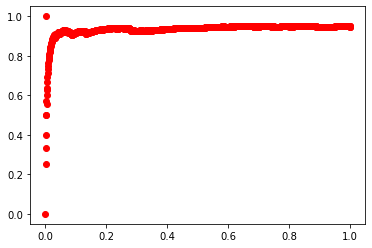

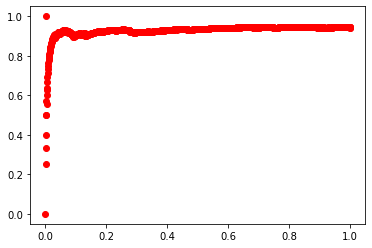

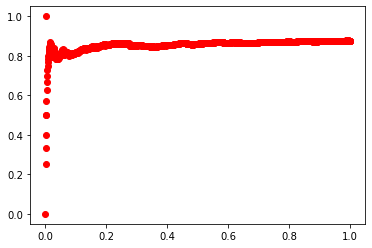

In [79]:
if cndn==3:
    titleKey = input("What would you like to search in title : ")
    writingKey = input("What would you like to search in text body : ")
    obj1.PRGraph(cndn,key1,titleKey,writingKey)

In [63]:
if cndn==3:
    obj1.booleanRet(cndn,key1)
    obj1.MAPWithStemming()

The list of documents which satisfy query are as follows : 

.T
experimental investigation of the aerodynamics of a
wing in a slipstream .

 5
.T
one-dimensional transient heat conduction into a double-layer
slab subjected to a linear heat input for a small time
internal .

 6
.T
one-dimensional transient heat flow in a multilayer
slab .

 7
.T
the effect of controlled three-dimensional roughness
on boundary layer transition at supersonic speeds .

 8
.T
measurements of the effect of two-dimensional and three-dimensional
roughness elements on boundary layer transition .

 10
.T
the theory of the impact tube at low pressure .

 11
.T
similar solutions in compressible laminar free mixing
problems .

 12
.T
some structural and aerelastic considerations of high
speed flight .

 13
.T
similarity laws for stressing heated wings .

 14
.T
piston theory - a new aerodynamic tool for the
aeroelastician .

 15
.T
on two-dimensional panel flutter .

 16
.T
transformation of the compressible turbul

In [65]:
if cndn==3:
    obj1.booleanRet(cndn,key1)
    obj1.MAPWithoutStemming()

The list of documents which satisfy query are as follows : 

.T
experimental investigation of the aerodynamics of a
wing in a slipstream .

 5
.T
one-dimensional transient heat conduction into a double-layer
slab subjected to a linear heat input for a small time
internal .

 6
.T
one-dimensional transient heat flow in a multilayer
slab .

 7
.T
the effect of controlled three-dimensional roughness
on boundary layer transition at supersonic speeds .

 8
.T
measurements of the effect of two-dimensional and three-dimensional
roughness elements on boundary layer transition .

 10
.T
the theory of the impact tube at low pressure .

 11
.T
similar solutions in compressible laminar free mixing
problems .

 12
.T
some structural and aerelastic considerations of high
speed flight .

 13
.T
similarity laws for stressing heated wings .

 14
.T
piston theory - a new aerodynamic tool for the
aeroelastician .

 15
.T
on two-dimensional panel flutter .

 16
.T
transformation of the compressible turbul

In [9]:
if cndn==3:
    wT = float(input("Enter weight for Title Section : "))
    wA = float(input("Enter weight for Author Section : "))
    wB = float(input("Enter weight for Background Section : "))
    wW = float(input("Enter weight for Writing Section : "))
    
    #taking input for keywords to be searched in each section
    tKey = input("What would you like to not search in title zone: ")
    aKey = input("What would you like to not search in author zone : ")
    bKey = input("What would you like to not search in background zone : ")
    wKey = input("What would you like to not search in writing zone : ")
    
    obj1.zoneScoring(cndn,wT,wA,wB,wW,tKey,aKey,bKey,wKey)

Enter weight for Title Section : .1
Enter weight for Author Section : .1
Enter weight for Background Section : .2
Enter weight for Writing Section : .6
What would you like to not search in title zone: simple
What would you like to not search in author zone : brenckman
What would you like to not search in background zone : mathematics
What would you like to not search in writing zone : shear
[('\n.T\nexperimental investigation of the aerodynamics of a\nwing in a slipstream .\n', 1.0), (' 5\n.T\none-dimensional transient heat conduction into a double-layer\nslab subjected to a linear heat input for a small time\ninternal .\n', 1.0), (' 6\n.T\none-dimensional transient heat flow in a multilayer\nslab .\n', 1.0), (' 7\n.T\nthe effect of controlled three-dimensional roughness\non boundary layer transition at supersonic speeds .\n', 1.0), (' 8\n.T\nmeasurements of the effect of two-dimensional and three-dimensional\nroughness elements on boundary layer transition .\n', 1.0), (' 10\n.T\nthe t